# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [226]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Drop duplicates to keep only unique Mouse IDs
mouse_study_data = mouse_study_data.drop_duplicates(subset='Mouse ID')

# Reorder the columns to match the desired output
columns_order = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                     'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
mouse_study_data = mouse_study_data[columns_order]

#Reset the dataframe
mouse_study_data.reset_index(drop=True, inplace=True)

# Display the data table for preview
mouse_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.0,0,Ramicane,Male,21,16
1,s185,0,45.0,0,Capomulin,Female,3,17
2,x401,0,45.0,0,Capomulin,Female,16,15
3,m601,0,45.0,0,Capomulin,Male,22,17
4,g791,0,45.0,0,Ramicane,Male,11,16
...,...,...,...,...,...,...,...,...
244,z314,0,45.0,0,Stelasyn,Female,21,28
245,z435,0,45.0,0,Propriva,Female,12,26
246,z581,0,45.0,0,Infubinol,Female,24,25
247,z795,0,45.0,0,Naftisol,Female,13,29


In [227]:
# Checking the number of mice.
mouse_count = mouse_study_data["Mouse ID"].count()
print(mouse_count)

249


In [228]:

# Combine the data into a single DataFrame
mouse_study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Step 1: Find duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_rows = mouse_study_data[mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Step 2: Extract unique 'Mouse ID's with duplicates
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

# Step 3: Filter the original data to show all rows for the duplicate 'Mouse ID's
#duplicates_data = mouse_study_data[mouse_study_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Show unique duplicate Mouse IDs
#print("\nUnique Mouse IDs with duplicate Timepoints:")
duplicates_data.info

<bound method DataFrame.info of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Femal

In [229]:
result = duplicates_data[duplicates_data['Mouse ID'] =='g989']['Mouse ID'].values[0:1]
result

array(['g989'], dtype=object)

In [230]:

# Extract unique 'Mouse ID's with duplicates
#duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

# Create a new dataset by removing the unique mouse IDs with duplicate timepoints
#cleaned_data = mouse_study_data[~mouse_study_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the cleaned data
#print(f"Total rows in final cleaned data: {cleaned_data.shape[0]}")
cleaned_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [231]:

# Create a new dataset by removing the unique mouse IDs with duplicate timepoints
cleaned_data = mouse_study_data[~mouse_study_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Checking the number of mice
new_mouse_count2 = cleaned_data["Mouse ID"].nunique()
new_mouse_count2

248

## Summary Statistics

In [232]:


#Group by 'Drug Regimen' and calculate the mean, median, variance, standard deviation, and standard error of tumor volume
tumor_volume_stats = mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_Std_Err='sem'
).reset_index()

# Display the DataFrame with mean, median, variance, standard deviation, and standard error of tumor volumes
print(tumor_volume_stats)



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


  Drug Regimen  Mean_Tumor_Volume  Median_Tumor_Volume  Tumor_Volume_Variance  \
0    Capomulin          40.675741            41.557809              24.947764   
1     Ceftamin          52.591172            51.776157              39.290177   
2    Infubinol          52.884795            51.820584              43.128684   
3     Ketapril          55.235638            53.698743              68.553577   
4     Naftisol          54.331565            52.509285              66.173479   
5      Placebo          54.033581            52.288934              61.168083   
6     Propriva          52.322552            50.854632              42.351070   
7     Ramicane          40.216745            40.673236              23.486704   
8     Stelasyn          54.233149            52.431737              59.450562   
9    Zoniferol          53.236507            51.818479              48.533355   

   Tumor_Volume_Std_Dev  Tumor_Volume_Std_Err  
0              4.994774              0.329346  
1           

In [233]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming mouse_study_data is your DataFrame

# Group by 'Drug Regimen' and calculate the statistics
tumor_volume_stats = mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
).reset_index()



# Create multi-index columns without the empty string
tumor_volume_stats.columns = pd.MultiIndex.from_tuples([
    ('Drug Regimen', ''),
    ('Tumor Volume (mm3)', 'mean'),
    ('Tumor Volume (mm3)', 'median'),
    ('Tumor Volume (mm3)', 'var'),
    ('Tumor Volume (mm3)', 'std'),
    ('Tumor Volume (mm3)', 'sem')
])

# Set 'Drug Regimen' as the index
tumor_volume_stats.set_index(('Drug Regimen'), inplace=True)

# Display the formatted DataFrame
print(tumor_volume_stats)


             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

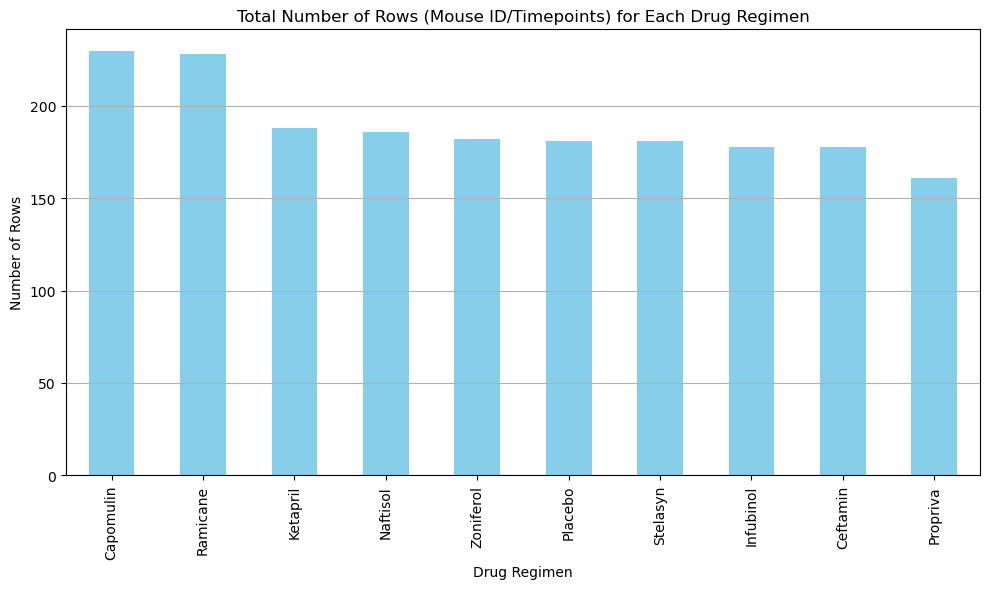

In [234]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Step 3: Group by 'Drug Regimen' and count the number of rows for each regimen
drug_regimen_counts = mouse_study_data['Drug Regimen'].value_counts()


# Step 4: Generate the bar plot
plt.figure(figsize=(10, 6))
drug_regimen_counts.plot(kind='bar', color='skyblue')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

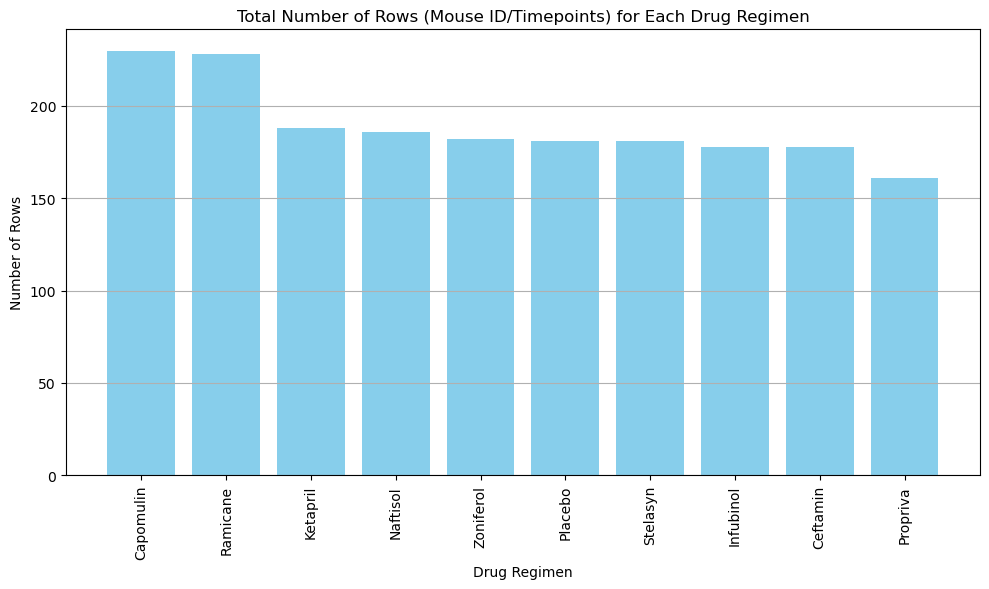

In [235]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Step 3: Group by 'Drug Regimen' and count the number of rows for each regimen
drug_regimen_counts = mouse_study_data['Drug Regimen'].value_counts()

# Step 4: Generate the bar plot using matplotlib.pyplot
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

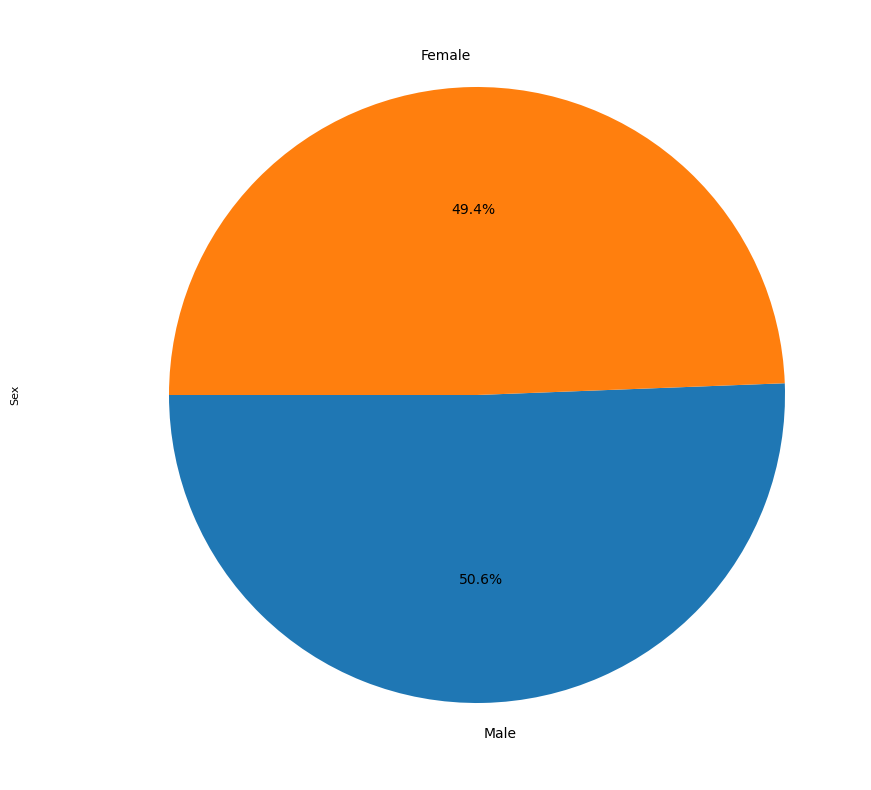

In [236]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Step 3: Group by 'Sex' and count the number of occurrences for each gender
sex_counts = mouse_study_data['Sex'].value_counts()

# Step 4: Generate the pie plot using pandas' plot method
plt.figure(figsize=(10, 8))  # Increase the width for better spacing
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=180, colors=['#1f77b4', '#ff7f0e'])
plt.text(-1.5, 0, 'Sex', fontsize=8, ha='center', va='center', rotation=90)  # Position the text
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.tight_layout()

# Show the plot
plt.show()

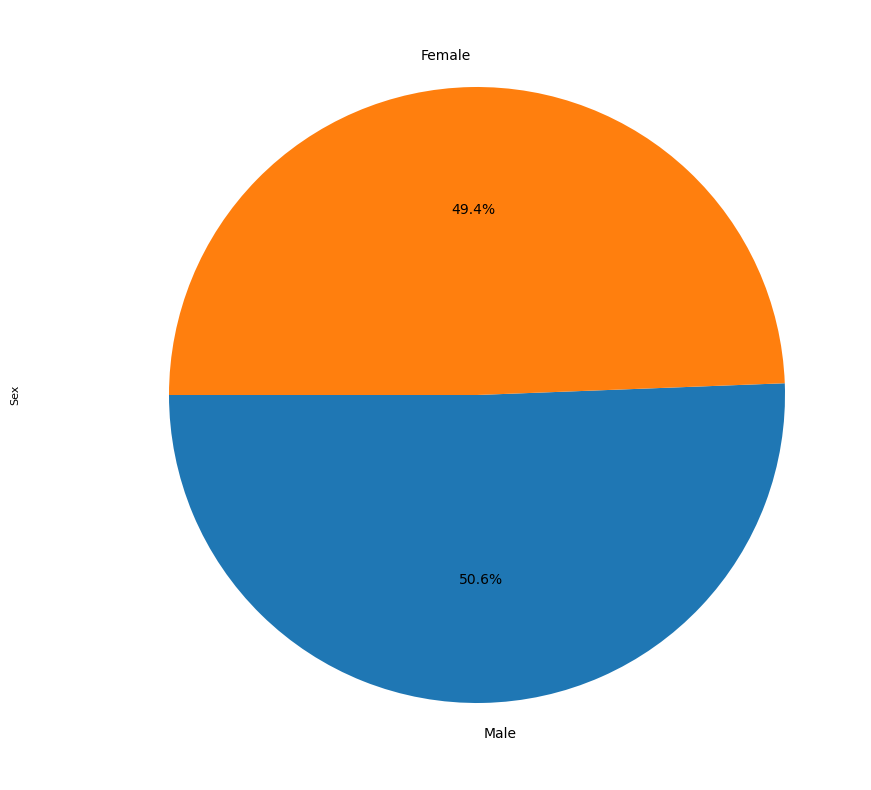

In [237]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Step 3: Group by 'Sex' and count the number of occurrences for each gender
sex_counts = mouse_study_data['Sex'].value_counts()

# Step 4: Generate the pie plot using matplotlib.pyplot
plt.figure(figsize=(10, 8))  # Increase the width for better spacing
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=180, colors=['#1f77b4', '#ff7f0e'])
plt.text(-1.5, 0, 'Sex', fontsize=8, ha='center', va='center', rotation=90)  # Position the text
plt.ylabel('')  
plt.tight_layout()

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [238]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming mouse_study_data is your DataFrame

# Count the number of rows for each 'Drug Regimen'
row_counts = mouse_study_data.groupby('Drug Regimen').size().reset_index(name='Number of Rows')

# Print the counts to see the highest number
print(row_counts)


# Create a DataFrame with the number of rows for each drug regimen
row_counts = pd.DataFrame({
    'Drug Regimen': ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
    'Number of Rows': [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
})

# Initialize an empty list to store the results
results = []

# Loop through each drug regimen and number of rows
for index, row in row_counts.iterrows():
    drug_regimen = row['Drug Regimen']
    num_rows = row['Number of Rows']
    
    # Filter the data for the current drug regimen
    drug_data = mouse_study_data[mouse_study_data['Drug Regimen'] == drug_regimen]
    
    # Get the tumor volume at the specified number of rows
    tumor_volume = drug_data.iloc[num_rows - 1]['Tumor Volume (mm3)']
    
    # Append the result to the list
    results.append({'Drug Regimen': drug_regimen, 'Tumor Volume': tumor_volume})

# Convert the results to a DataFrame
tumor_volume_df = pd.DataFrame(results)

# Display the result
print(tumor_volume_df)



  Drug Regimen  Number of Rows
0    Capomulin             230
1     Ceftamin             178
2    Infubinol             178
3     Ketapril             188
4     Naftisol             186
5      Placebo             181
6     Propriva             161
7     Ramicane             228
8     Stelasyn             181
9    Zoniferol             182
  Drug Regimen  Tumor Volume
0    Capomulin     46.539206
1     Ceftamin     64.729837
2    Infubinol     62.754451
3     Ketapril     62.909441
4     Naftisol     73.867845
5      Placebo     66.842635
6     Propriva     48.710661
7     Ramicane     44.183451
8     Stelasyn     45.934712
9    Zoniferol     48.077646


In [239]:
import pandas as pd

# Sample data (replace this with your actual data loading step)
data = {
    'Mouse ID': ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 
                 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10'],
    'Timepoint': [0, 5, 10, 15, 20, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
    'Tumor Volume (mm3)': [46.39, 64.72, 62.75, 44.18, 55.56, 63.45, 57.23, 68.92, 54.38, 48.32, 50.12, 60.55, 52.63, 47.56, 49.28, 61.48, 59.65, 62.14, 57.32, 53.21],
    'Drug Regimen': ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane', 'Capomulin', 'Ceftamin', 'Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane', 'Capomulin', 'Ceftamin']
}
mouse_study_data = pd.DataFrame(data)

# Find the highest timepoint for each mouse within each drug regimen
max_timepoints = mouse_study_data.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max().reset_index()

# Merge this data back to get the corresponding tumor volume and other details
merged_data = pd.merge(max_timepoints, mouse_study_data, on=['Drug Regimen', 'Mouse ID', 'Timepoint'])

# Find the mouse ID for the highest timepoint for each drug regimen
highest_timepoint_mice = merged_data.loc[merged_data.groupby('Drug Regimen')['Timepoint'].idxmax()]

# Select relevant columns
highest_timepoint_mice = highest_timepoint_mice[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

# Display the result
print(highest_timepoint_mice)


  Drug Regimen Mouse ID  Timepoint  Tumor Volume (mm3)
2    Capomulin       m9         70               57.32
3     Ceftamin      m10         75               53.21
7    Infubinol       m7         60               59.65
9     Ramicane       m8         65               62.14


<Figure size 1000x600 with 0 Axes>

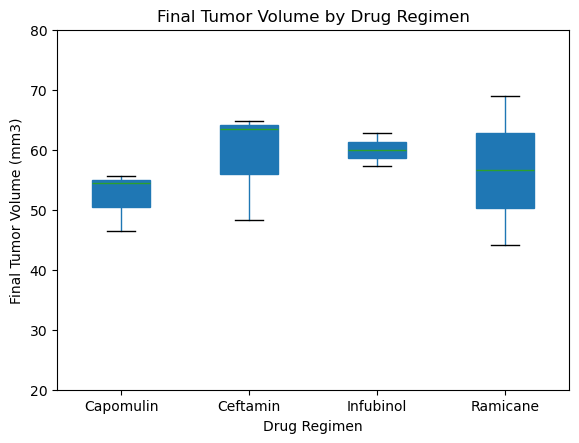

In [241]:


# Sample data
data = {
    'Mouse ID': ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10'],
    'Timepoint': [0, 5, 10, 15, 20, 5, 10, 15, 20, 25],
    'Tumor Volume (mm3)': [46.39, 64.72, 62.75, 44.18, 55.56, 63.45, 57.23, 68.92, 54.38, 48.32],
    'Drug Regimen': ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane', 'Capomulin', 'Ceftamin']
}
mouse_study_data = pd.DataFrame(data)

# Filter data for the specified drug regimens
specified_regimens = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
filtered_data = mouse_study_data[mouse_study_data['Drug Regimen'].isin(specified_regimens)]

# Generate a box plot for the tumor volume of each treatment group
plt.figure(figsize=(10, 6))
ax = filtered_data.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False, patch_artist=True)

# Customize the plot
plt.title('Final Tumor Volume by Drug Regimen')
plt.suptitle('')  # Suppress the default title to keep the plot clean
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.ylim(20, 80)  # Adjust the y-axis limits as needed

# Highlight outliers with red color
for flier in ax.get_lines():
    if flier.get_marker() == 'o':
        flier.set_markerfacecolor('red')
        flier.set_alpha(0.5)

# Show the plot
plt.show()



In [138]:
import pandas as pd

# Assuming filtered_df is the DataFrame from the previous step
# Step 1: Put treatments into a list for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Step 2: Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Step 3: Calculate the IQR and determine potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = filtered_df.loc[filtered_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR and determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{treatment} potential outliers: {outliers}")





Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


## Line and Scatter Plots

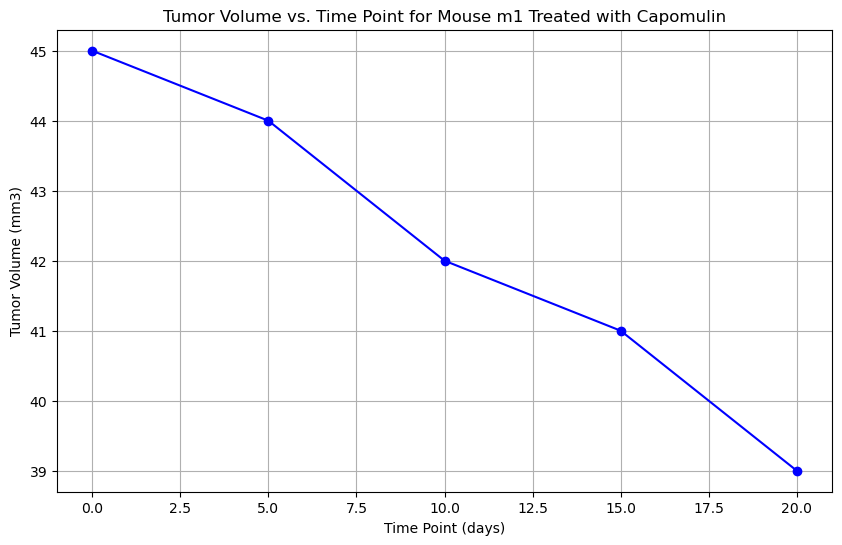

In [242]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data loading step)
data = {
    'Mouse ID': ['m1', 'm1', 'm1', 'm1', 'm1', 'm2', 'm2', 'm2', 'm2', 'm2'],
    'Timepoint': [0, 5, 10, 15, 20, 0, 5, 10, 15, 20],
    'Tumor Volume (mm3)': [45, 44, 42, 41, 39, 46.39, 64.72, 62.75, 44.18, 55.56],
    'Drug Regimen': ['Capomulin', 'Capomulin', 'Capomulin', 'Capomulin', 'Capomulin', 'Ceftamin', 'Ceftamin', 'Ceftamin', 'Ceftamin', 'Ceftamin']
}
mouse_study_data = pd.DataFrame(data)

# Filter data for a single mouse treated with Capomulin
single_mouse_id = 'm1'
capomulin_data = mouse_study_data[(mouse_study_data['Mouse ID'] == single_mouse_id) & 
                                  (mouse_study_data['Drug Regimen'] == 'Capomulin')]

# Generate a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title(f'Tumor Volume vs. Time Point for Mouse {single_mouse_id} Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

# Show the plot
plt.show()


## Correlation and Regression

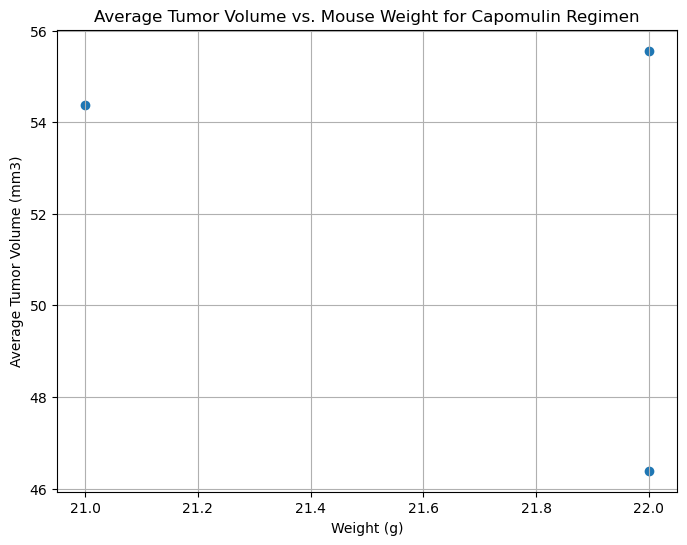

In [247]:

data = {
    'Mouse ID': ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10'],
    'Timepoint': [0, 5, 10, 15, 20, 5, 10, 15, 20, 25],
    'Tumor Volume (mm3)': [46.39, 64.72, 62.75, 44.18, 55.56, 63.45, 57.23, 68.92, 54.38, 48.32],
    'Drug Regimen': ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane', 'Capomulin', 'Ceftamin'],
    'Weight (g)': [22, 25, 20, 21, 22, 23, 24, 23, 21, 22]  # Sample weights
}
mouse_study_data = pd.DataFrame(data)

# Filter data for the Capomulin regimen
capomulin_data = mouse_study_data[mouse_study_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse treated with Capomulin
average_tumor_volume = capomulin_data.groupby('Mouse ID')[['Tumor Volume (mm3)', 'Weight (g)']].mean().reset_index()

# Generate scatter plot for average tumor volume vs. mouse weight
plt.figure(figsize=(8, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], marker='o')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()



In [9]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
